# Business Understanding:

### The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. I'm working for a consumer finance company which specialises in lending various types of loans to urban customers. 

### In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


### Here I'm using EDA to analyse the patterns present in the data. This will ensure that the applicants are capable of repaying the loan are not rejected.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import glob
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# adjusting display
from IPython.display import display
pd.options.display.max_columns = 158
pd.options.display.max_rows = 146

# Reading application_data.csv

In [3]:
# reading application_data.csv 
df= pd.read_csv("C:/Users/Paunikar/Documents/MY CREDIT EDA CASE STUDY/application_data.csv")
applicationdata_df=df

# Checking information of "application_data.csv" 

In [4]:
# check info of "application_data.csv"
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

# Finding percentage of missing values of columns

In [5]:
#percentage of missing values of columns
missingvalues = df.count()/len(df)
missingvalues = (1-missingvalues)*100

In [6]:
# sorting percentage of missing values of columns 
missingvalues.sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [7]:
# Selecting the columns with low missing values
df2 = df.loc[:, missingvalues<50]

# Checking columns of variables having ~ 13% missing values 
## Treating missing values
Columns having more than or equal to 50% missing values are not good for analysis. We will consider column having less missing values for analysis. According to me most of the columnns which are having more than or equal to 50% are either total, mean , median or mode values. We cant replace these missing values    

#### AMT_REQ_CREDIT_BUREAU_HOUR' column : 
We ignore this column because in this column most of the value are 0's & no variation. 

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

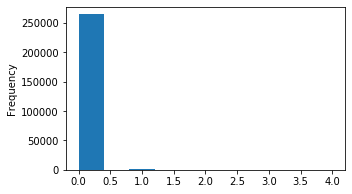

In [8]:
# analysing 'AMT_REQ_CREDIT_BUREAU_HOUR' column
plt.rcParams["figure.figsize"] = [5,3]
df2['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist()
df2['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

#### AMT_REQ_CREDIT_BUREAU_DAY' column
We ignore this column because in this column most of the value are 0's & no variation. 

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

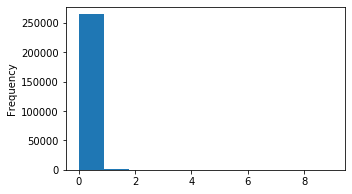

In [9]:
# analysing AMT_REQ_CREDIT_BUREAU_DAY' column
df2['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist()
df2['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

#### 'AMT_REQ_CREDIT_BUREAU_MON' column: 
We ignore this column because in this column most of the value are 0's & no variation. 

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

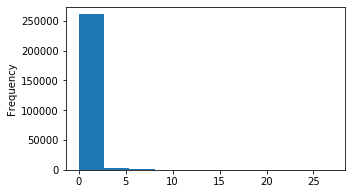

In [10]:
# analysing 'AMT_REQ_CREDIT_BUREAU_MON' column
df2['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist()
df2['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

#### 'AMT_REQ_CREDIT_BUREAU_WEEK' column:
We ignore this column because in this column most of the value are 0's & no variation. 

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

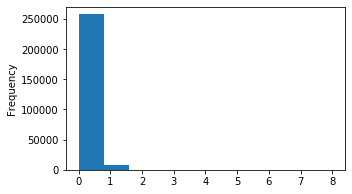

In [11]:
# analysing 'AMT_REQ_CREDIT_BUREAU_WEEK' column
df2['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist()
df2['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

#### 'AMT_REQ_CREDIT_BUREAU_YEAR' column
We ignore this column because in this column most of the value are 0's & no variation. 

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

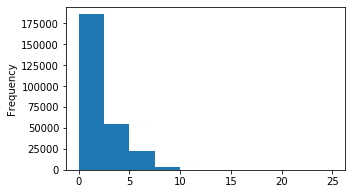

In [12]:
# analysing 'AMT_REQ_CREDIT_BUREAU_YEAR' column
df2['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist()
df2['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

#### 'AMT_REQ_CREDIT_BUREAU_QRT' column : 
We ignore this column because in this column most of the value are 0's & no variation. 

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

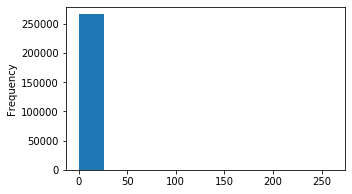

In [13]:
# analysing 'AMT_REQ_CREDIT_BUREAU_QRT' column
df2['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist()
df2['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

# Analysing data imbalancing 

In [14]:
# counting "TARGET" values
df2['TARGET'].count()

307511

In [15]:
# counting "TARGET" values having 0's
a=(df2['TARGET' ]==0) .sum()
a

282686

In [16]:
# counting "TARGET" values having 1's
b=(df2['TARGET' ]==1) .sum()
b

24825

In [17]:
# ratio of "TARGET" values having 0's and "TARGET" values having 1's
a/b

11.387150050352467

### Data imbalancing ( 'TARGET' column)

In [18]:
df['TARGET'].value_counts()
value_Y = len(df[df['TARGET']==0])
value_N = len(df[df['TARGET']==1])

#percentage of rows having 'Y' value
percent_value_y= value_Y/(value_Y+value_N)
print("Percent of applicants who dont have payment difficulties",percent_value_y*100)

#percentage of rows having 'N' value
percent_value_n= value_N/(value_Y+value_N)
print("Percent of applicants who have payment difficulties",percent_value_n*100)

Percent of applicants who dont have payment difficulties 91.92711805431351
Percent of applicants who have payment difficulties 8.072881945686495


### Data imbalancing ( 'CODE_GENDER')


In [19]:
#Data imbalancing for( gender of applicants)
df['CODE_GENDER'].value_counts()
value_f = len(df[df['CODE_GENDER']=='F'])
value_m = len(df[df['CODE_GENDER']=='M'])

#percentage of rows having 'Y' value
percent_value_f= value_f/(value_f+value_m)
print("Percent of applicants who are female",percent_value_f*100)

#percentage of rows having 'N' value
percent_value_m= value_m/(value_f+value_m)
print("Percent of applicants who are male",percent_value_m*100)

Percent of applicants who are female 65.83524927887821
Percent of applicants who are male 34.16475072112179


# Splitting data into df_0 and df_1

# df_0 consisting of TARGET value =0 i.e. these consist of non-defaulters.
# df_1 consisting of TARGET value =1 i.e. these consist of defaulters.


### Spliting the dataset using Target value = 0

In [20]:
df_0= df.loc[df2['TARGET']==0]
df_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash l

### Spliting the dataset using Target value =1

In [21]:
df_1= df.loc[df2['TARGET']==1]
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,NaN,0.0094,NaN,0.0000,0.0168,0.0092,0.9732,NaN,NaN,0.0000,0.0690,0.0417,NaN,0.0271,NaN,0.0083,NaN,0.0000,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.306841,0.320163,0.1309,0.1250,0.9960,0.9456,0.0822,0.16,0.1379,0.2500,0.2917,0.0142,0.1059,0.1267,0.0039,0.0078,0.1334,0.1297,0.9960,0

# Univariate analysis (categorical data)  of "application_data.csv" 

#### Univariate analysis of categorical "CODE_GENDER","NAME_EDUCATION_TYPE", "NAME_INCOME_TYPE", "FLAG_OWN_REALTY", "FLAG_OWN_CAR" by plotting countplot of "application_data.csv" 

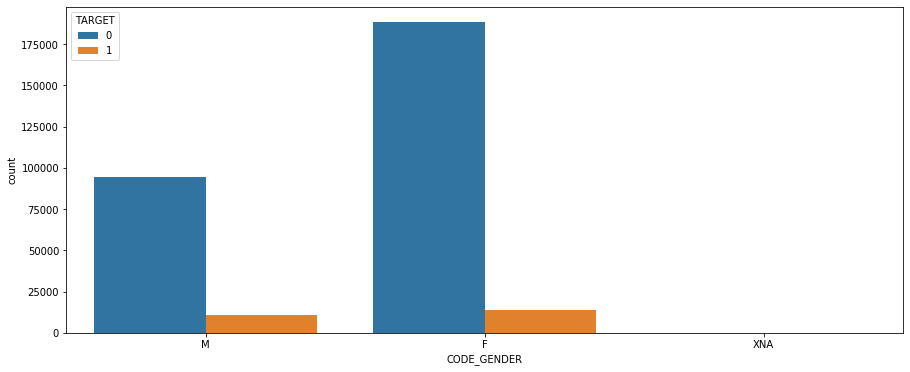

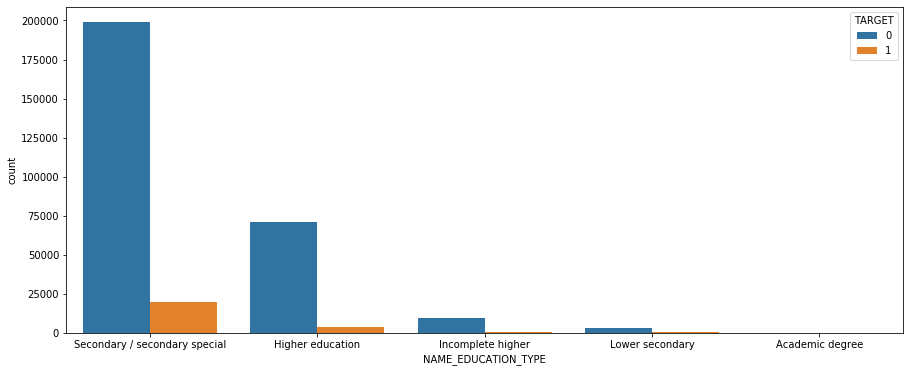

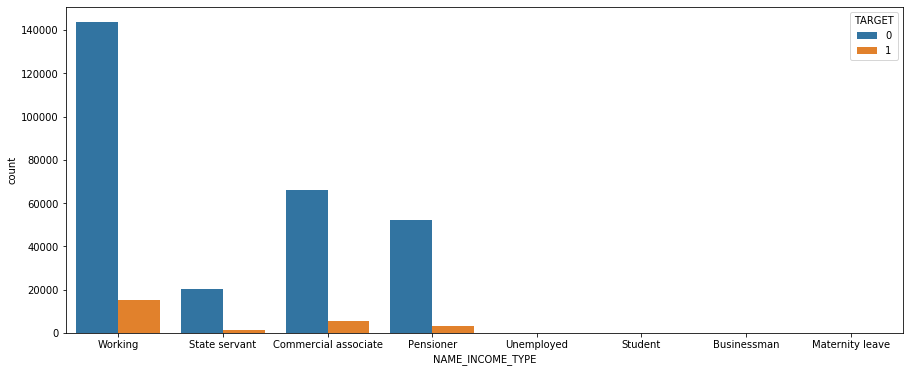

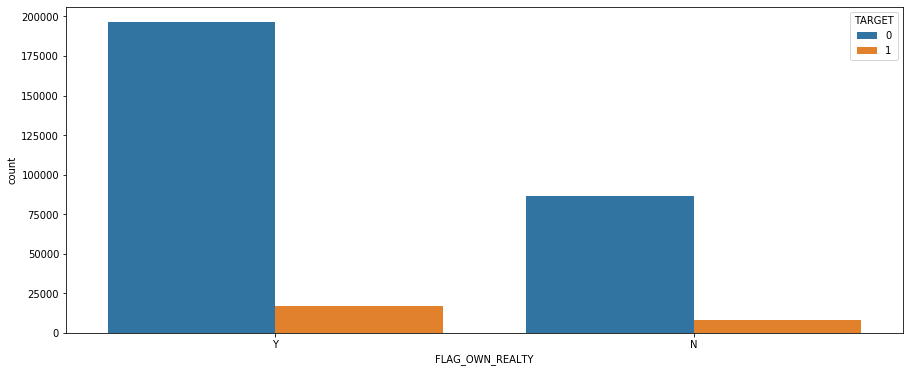

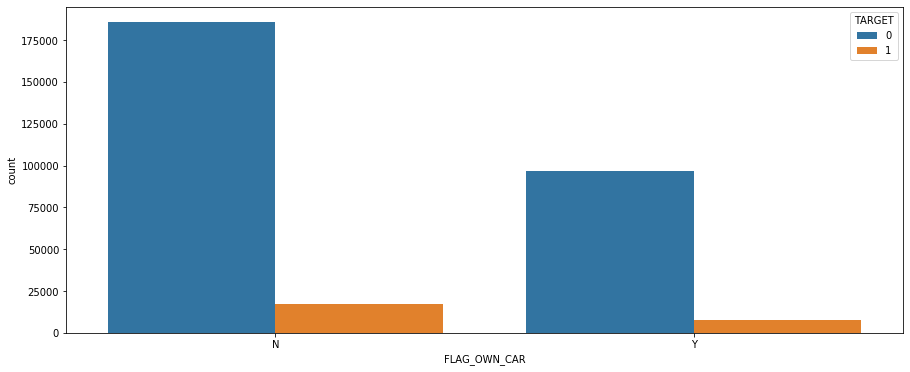

In [22]:
plt.rcParams["figure.figsize"] = [15,6]
list1=["CODE_GENDER","NAME_EDUCATION_TYPE","NAME_INCOME_TYPE","FLAG_OWN_REALTY","FLAG_OWN_CAR"]
for item in list1:    
    sns.countplot(x=item , hue = 'TARGET', data = df2)
    plt.show()    
    

# Univariate analysis ( numerical data) of "application_data.csv" 

#### Univariate analysis of numerical data "CNT_CHILDREN","REGION_RATING_CLIENT","AMT_REQ_CREDIT_BUREAU_QRT" by plotting countplot of "application_data.csv" 

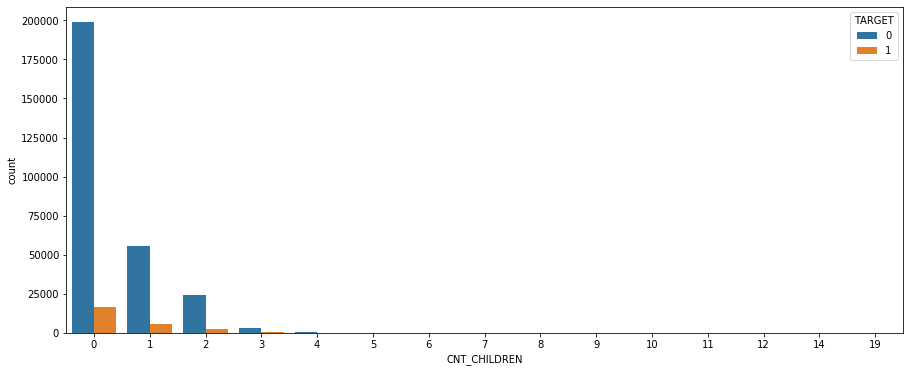

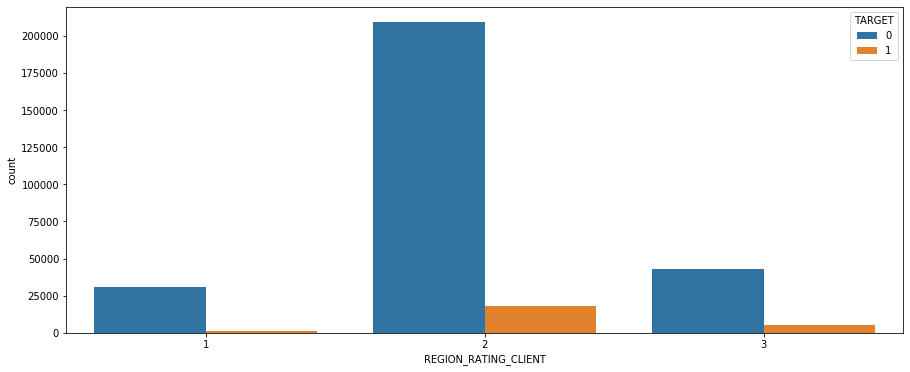

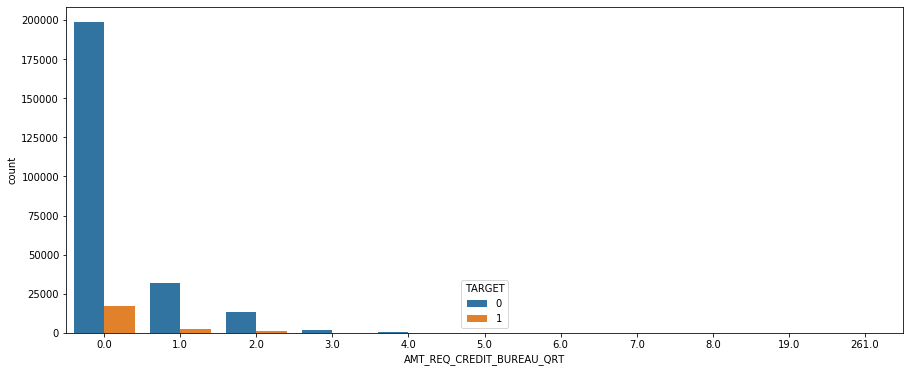

In [23]:
plt.rcParams["figure.figsize"] = [15,6]
list2=["CNT_CHILDREN","REGION_RATING_CLIENT","AMT_REQ_CREDIT_BUREAU_QRT"]
for item in list2:    
    sns.countplot(x=item , hue = 'TARGET', data = df2)
    plt.show()    

# Top 10 correlated variables

## Correlation plot of df_0

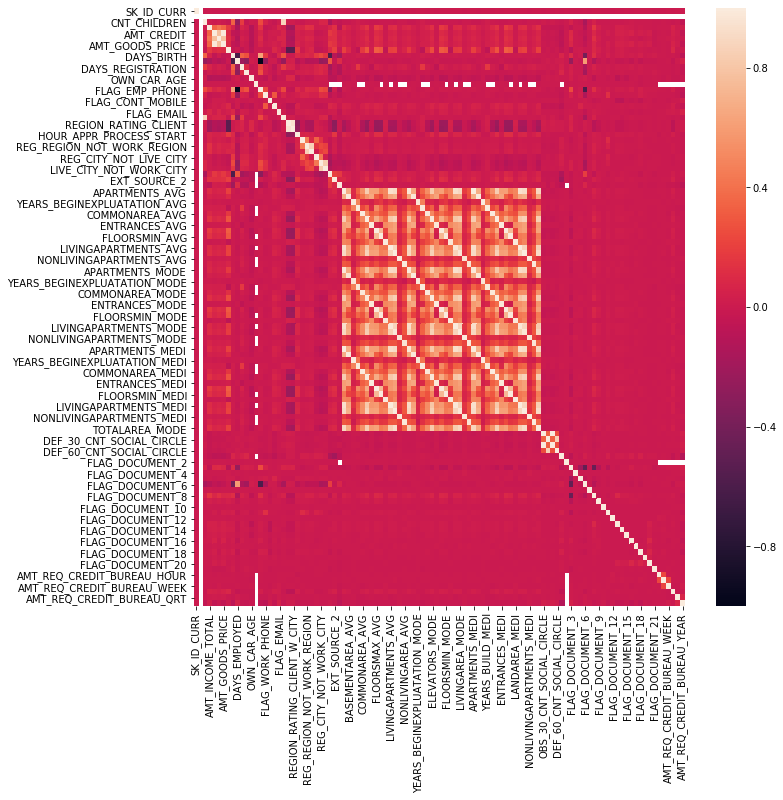

In [24]:
# PLOTTING CORRELATION PLOT OF df_0
plt.rcParams["figure.figsize"] = [11,11]
sns.heatmap(df_0.corr())
plt.show()

### Top correlated variables of df_0

In [25]:
# finding and sorting correlation between variables
a= df_0.corr().abs()
a= a.unstack().sort_values(kind="quicksort")
a=a.dropna()
a= a[a != 1.0]
print(a)

FLAG_DOCUMENT_2               EXT_SOURCE_2                    0.000004
EXT_SOURCE_2                  FLAG_DOCUMENT_2                 0.000004
FLAG_DOCUMENT_12              FLAG_MOBIL                      0.000005
FLAG_MOBIL                    FLAG_DOCUMENT_12                0.000005
FLAG_DOCUMENT_4               YEARS_BEGINEXPLUATATION_MEDI    0.000008
YEARS_BEGINEXPLUATATION_MEDI  FLAG_DOCUMENT_4                 0.000008
FLAG_MOBIL                    FLAG_DOCUMENT_10                0.000009
FLAG_DOCUMENT_10              FLAG_MOBIL                      0.000009
FLAG_DOCUMENT_15              YEARS_BUILD_MEDI                0.000010
YEARS_BUILD_MEDI              FLAG_DOCUMENT_15                0.000010
FLAG_DOCUMENT_2               FLAG_MOBIL                      0.000011
FLAG_MOBIL                    FLAG_DOCUMENT_2                 0.000011
COMMONAREA_MEDI               FLAG_DOCUMENT_17                0.000013
FLAG_DOCUMENT_17              COMMONAREA_MEDI                 0.000013
FLAG_D

### Top correlated variables of df_0

#### APARTMENTS_MEDI...................APARTMENTS_AVG...................0.995163
#### LIVINGAREA_AVG...................LIVINGAREA_MEDI...................0.995568
#### COMMONAREA_MEDI...................COMMONAREA_AVG...................0.995857
#### ELEVATORS_AVG...................ELEVATORS_MEDI...................0.996161
#### ENTRANCES_MEDI...................ENTRANCES_AVG...................0.996899
#### FLOORSMAX_MEDI...................FLOORSMAX_AVG...................0.997018
#### FLOORSMIN_AVG...................FLOORSMIN_MEDI...................0.997202
#### OBS_60_CNT_SOCIAL_CIRCLE...................OBS_30_CNT_SOCIAL_CIRCLE...................0.998508
#### YEARS_BUILD_AVG...................YEARS_BUILD_MEDI...................0.998522
#### DAYS_EMPLOYED...................FLAG_EMP_PHONE...................0.999758

## correlation plot of df_1

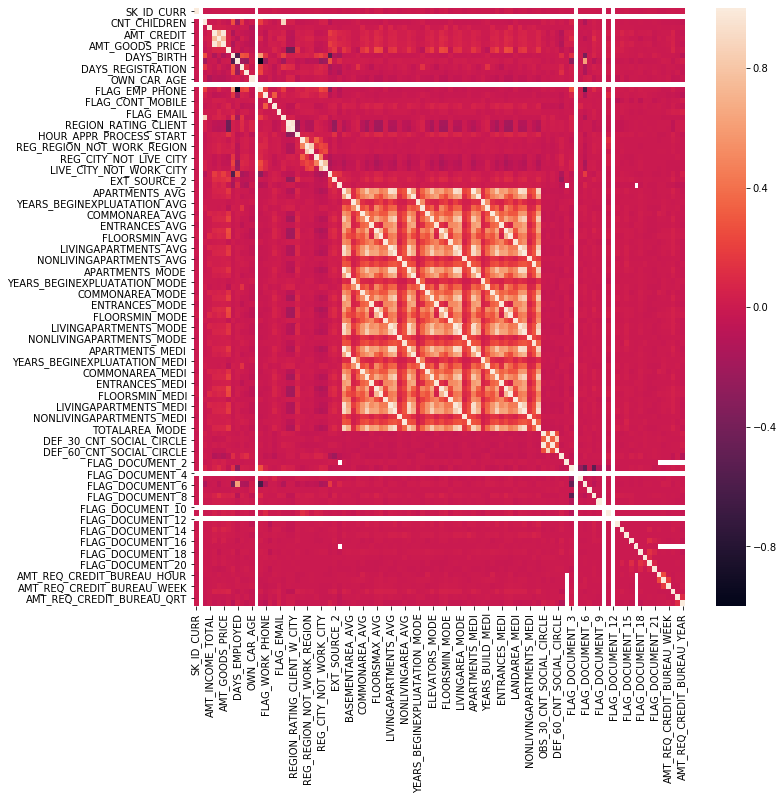

In [26]:
# PLOTTING CORRELATION PLOT OF df_1
plt.rcParams["figure.figsize"] = [11,11]
sns.heatmap(df_1.corr())
plt.show()

### Top correlated variables of df_1

In [27]:
# finding and sorting correlation between variables
a= df_1.corr().abs()
a= a.unstack().sort_values(kind="quicksort")
a= a.dropna()
a= a[a!= 1.0]
print(a)

REGION_RATING_CLIENT          FLAG_DOCUMENT_20                0.000010
FLAG_DOCUMENT_20              REGION_RATING_CLIENT            0.000010
LIVE_REGION_NOT_WORK_REGION   REG_CITY_NOT_LIVE_CITY          0.000011
REG_CITY_NOT_LIVE_CITY        LIVE_REGION_NOT_WORK_REGION     0.000011
AMT_REQ_CREDIT_BUREAU_WEEK    AMT_INCOME_TOTAL                0.000018
AMT_INCOME_TOTAL              AMT_REQ_CREDIT_BUREAU_WEEK      0.000018
NONLIVINGAPARTMENTS_AVG       FLAG_DOCUMENT_14                0.000019
FLAG_DOCUMENT_14              NONLIVINGAPARTMENTS_AVG         0.000019
FLAG_EMP_PHONE                EXT_SOURCE_2                    0.000028
EXT_SOURCE_2                  FLAG_EMP_PHONE                  0.000028
FLOORSMIN_MODE                FLAG_DOCUMENT_17                0.000032
FLAG_DOCUMENT_17              FLOORSMIN_MODE                  0.000032
FLOORSMIN_MODE                FLAG_DOCUMENT_7                 0.000032
FLAG_DOCUMENT_7               FLOORSMIN_MODE                  0.000032
OBS_30

### Top correlated variables of df_1

#### NONLIVINGAPARTMENTS_MEDI...................NONLIVINGAPARTMENTS_MODE   ...................     0.997032

#### FLOORSMAX_MEDI         ...................       FLOORSMAX_AVG          ...................         0.997187

#### LIVINGAPARTMENTS_AVG   ...................       LIVINGAPARTMENTS_MEDI     ...................      0.997668

#### FLOORSMIN_AVG        ...................         FLOORSMIN_MEDI          ...................        0.997825

#### NONLIVINGAPARTMENTS_AVG   ...................    NONLIVINGAPARTMENTS_MEDI  ...................      0.998075

#### YEARS_BUILD_MEDI        ...................      YEARS_BUILD_AVG           ...................      0.998100

#### COMMONAREA_AVG             ...................   COMMONAREA_MEDI         ...................        0.998107

#### BASEMENTAREA_MEDI         ...................    BASEMENTAREA_AVG         ...................       0.998250

#### OBS_60_CNT_SOCIAL_CIRCLE   ...................   OBS_30_CNT_SOCIAL_CIRCLE   ...................     0.998269

#### DAYS_EMPLOYED        ...................         FLAG_EMP_PHONE         ...................         0.999702


# Converting values into understandable values

### DAYS_BIRTH column represents Client's age in days at the time of application. Here we are converting the values into the understandable format.

In [28]:
# analyzing values
df2['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [29]:
# Converting 'DAYS_BIRTH' values into understandable values
# rounding values using "round"
df2['DAYS_BIRTH'] = -round(df2['DAYS_BIRTH']/365, 0)
df2['DAYS_BIRTH'].head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64

### 'DAYS_ID_PUBLISH' column represents How many days before the application did client change the identity document with which he applied for the loan. Here we are converting the values into the understandable format

In [30]:
# analyzing values
df2['DAYS_ID_PUBLISH'].head()

0   -2120
1    -291
2   -2531
3   -2437
4   -3458
Name: DAYS_ID_PUBLISH, dtype: int64

In [31]:
# Converting 'DAYS_ID_PUBLISH' values into understandable values
# rounding values using "round"
df2['DAYS_ID_PUBLISH'] = -round(df2['DAYS_ID_PUBLISH']/365, 0)
df2['DAYS_ID_PUBLISH'].head()

0    6.0
1    1.0
2    7.0
3    7.0
4    9.0
Name: DAYS_ID_PUBLISH, dtype: float64

# Binning of values

### Performing binning on 'AMT_INCOME_TOTAL' for target 0

In [32]:
#Performing binning on 'AMT_INCOME_TOTAL' for target 0
bins=[10000,50000,100000,200000,300000]
s= pd.cut(df_0['AMT_INCOME_TOTAL'],bins= bins).value_counts()
s

(100000, 200000]    142572
(200000, 300000]     60255
(50000, 100000]      54299
(10000, 50000]        4174
Name: AMT_INCOME_TOTAL, dtype: int64

From binning we can see that most of the applicants belongs to the (100000,200000) segment. Very less people has applied for loan whose income is (10000,50000)

### Performing binning on 'AMT_INCOME_TOTAL' for target 1

In [33]:
#Performing binning on 'AMT_INCOME_TOTAL' for target 1
bins=[10000,50000,100000,200000,300000]
s= pd.cut(df_1['AMT_INCOME_TOTAL'],bins= bins).value_counts()
s

(100000, 200000]    13326
(200000, 300000]     4921
(50000, 100000]      4882
(10000, 50000]        343
Name: AMT_INCOME_TOTAL, dtype: int64

Binning has been done on total income to categorize the number of people according to total income.Most applications are from  1-2 lac segment people in both groups

### Performing binning on 'DAYS_BIRTH' on target 0


In [34]:
#Performing binning on 'DAYS_BIRTH' on target 0
bins=[0,10000,15000,20000,25000,30000]
label=['0-27','27-41','41-54','54-68','68-82']
df_age= abs(df_0['DAYS_BIRTH'])
s= pd.cut(df_age,bins= bins,labels=label).value_counts()
s

27-41    101647
41-54     93101
54-68     66347
0-27      21285
68-82       306
Name: DAYS_BIRTH, dtype: int64

### Performing binning on 'DAYS_BIRTH' on target 1


In [35]:
#Performing binning on 'DAYS_BIRTH' on target 1
bins=[0,10000,15000,20000,25000,30000]
label=['0-27','27-41','41-54','54-68','68-82']
df_age= abs(df_1['DAYS_BIRTH'])
s= pd.cut(df_age,bins= bins,labels=label).value_counts()
s

27-41    11005
41-54     7361
54-68     3660
0-27      2786
68-82       13
Name: DAYS_BIRTH, dtype: int64

After binning we can categorize the number of application on the basis of age. Most of the applicants are form 27-41 age group

### Performing binning on'DAYS_EMPLOYED' on target 0


In [36]:
#Performing binning on'DAYS_EMPLOYED' on target 0
bins=[10000,12500,15000,17500,20000]
df_age= abs(df_0['DAYS_EMPLOYED'])
s= pd.cut(df_age,bins= bins).value_counts()
s

(10000, 12500]    3093
(12500, 15000]    1126
(15000, 17500]     158
(17500, 20000]       5
Name: DAYS_EMPLOYED, dtype: int64

### Performing binning on'DAYS_EMPLOYED' on target 1

In [37]:
#Performing binning on'DAYS_EMPLOYED' on target 1
bins=[10000,12500,15000,17500,20000]
df_age= abs(df_1['DAYS_EMPLOYED'])
s= pd.cut(df_age,bins= bins).value_counts()
s

(10000, 12500]    138
(12500, 15000]     25
(15000, 17500]      1
(17500, 20000]      0
Name: DAYS_EMPLOYED, dtype: int64

Binning has been on days of employment of applicants.

# Transforming numerial values to categorical values for further analysis 

### Categorising people according to low income and high income using 'AMT_INCOME_TOTAL'column

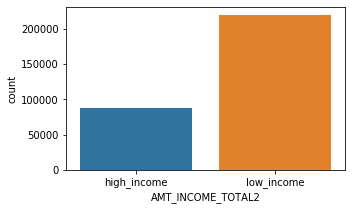

In [38]:
# Here we are making INCOME_TOTAL function inorder to convert numerical values to categorical values.
def INCOME_TOTAL(x):
    if x <= 20000:
        return 'low_income'
    elif x > 20000 and x <=200000:
        return 'low_income'
    elif x > 200000 and x <=300000:
        return 'high_income'
    else:
        return 'high_income'
plt.rcParams["figure.figsize"] = [5,3]
df2['AMT_INCOME_TOTAL2'] = df2['AMT_INCOME_TOTAL'].apply(lambda x:INCOME_TOTAL(x))
sns.countplot(x= 'AMT_INCOME_TOTAL2', data = df2)

# Removing Outliers values from data

## Removing outliers of the 'AMT_INCOME_TOTAL' column df_1

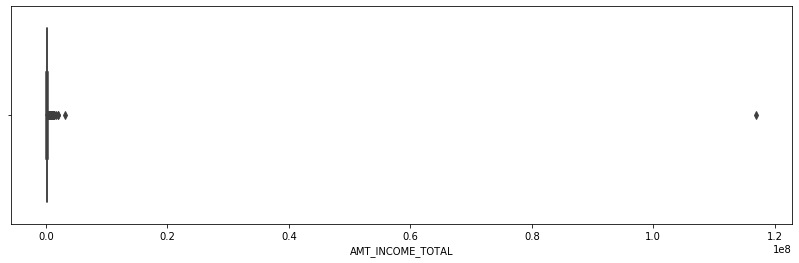

In [39]:
# box plot for the 'AMT_INCOME_TOTAL' column df_1
plt.figure(figsize=(14,4))
sns.boxplot(x=df_1['AMT_INCOME_TOTAL'])

As it can be seen from the above box plot for the AMT_TOTAL_INCOME column there are some outliers and they are stopping us from getting a clear picture of the data.

In [40]:
# Calculating the Inter Quartile value for AMT_TOTAL_INCOME column 
Q1_1 = df_1['AMT_INCOME_TOTAL'].quantile(0.25)
Q3_1 = df_1['AMT_INCOME_TOTAL'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1
print(IQR_1)

90000.0


In [41]:
# Removing the outliers from the 'AMT_INCOME_TOTAL' of df_1
df_3 = df_1[~((df_1['AMT_INCOME_TOTAL'] < (Q1_1 - 1.5 * IQR_1)) |(df_1['AMT_INCOME_TOTAL'] > (Q3_1 + 1.5 * IQR_1)))]
df_3.shape

(24009, 122)

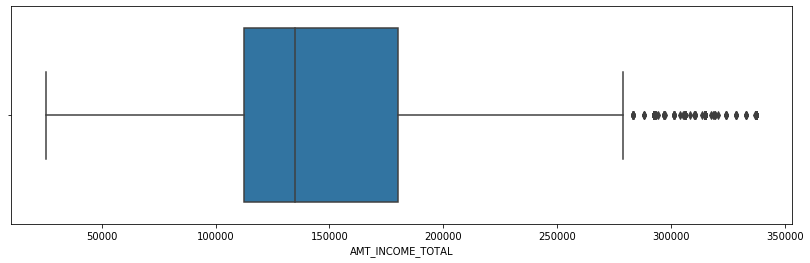

In [42]:
plt.figure(figsize=(14,4))
sns.boxplot(x=df_3['AMT_INCOME_TOTAL'])

As we can see from the above graph after removing the outliers we can see the graph more clearly and can say that most of the people who faced difficulty paying back the loan had the income in range of 1.2 lakh to 2.1 lakh.

## Removing outliers of the 'AMT_INCOME_TOTAL' column df_0

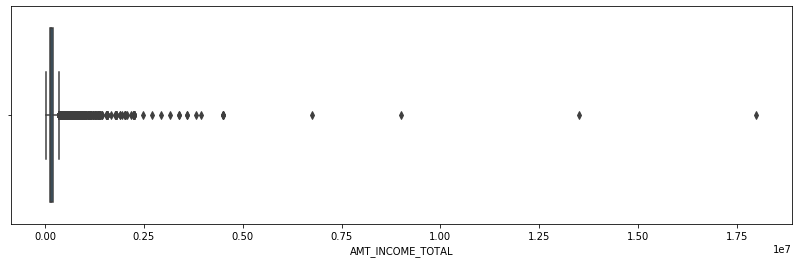

In [43]:
# box plot for the 'AMT_INCOME_TOTAL' column df_0
plt.figure(figsize=(14,4))
sns.boxplot(x=df_0['AMT_INCOME_TOTAL'])

In [44]:
# Calculating the Inter Quantile value for AMT_TOTAL_INCOME column 
Q1_0 = df_0['AMT_INCOME_TOTAL'].quantile(0.25)
Q3_0 = df_0['AMT_INCOME_TOTAL'].quantile(0.75)
IQR_0 = Q3_0 - Q1_0
print(IQR_0)

90000.0


In [45]:
# Removing the outliers from the df_0
df_4 = df_0[~((df_0['AMT_INCOME_TOTAL'] < (Q1_0 - 1.5 * IQR_0)) |(df_0['AMT_INCOME_TOTAL'] > (Q3_0 + 1.5 * IQR_0)))]
df_4.shape

(269467, 122)

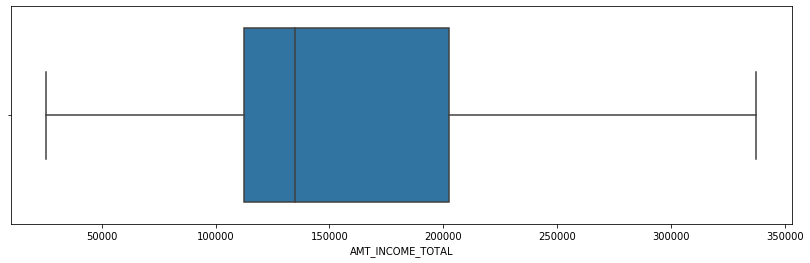

In [46]:
#Plotting box plot for the AMT_TOTAL_INCOME column
plt.figure(figsize=(14,4))
sns.boxplot(x=df_4['AMT_INCOME_TOTAL'])

As we can see from the above graph the people who did not face any difficulty while paying back the loan also have the income in the range of 1.2 lakh to 2.1 lakh however the number of people having income in or around teh 95 percentile are more so the people who did not face any difficulty were the ones that were earning more.

## Removing outliers of the 'DAYS_LAST_PHONE_CHANGE'column df_0

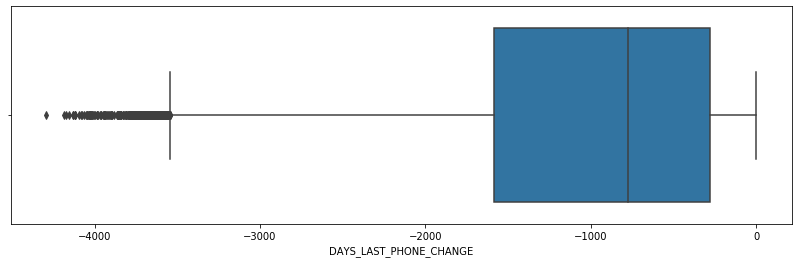

In [47]:
#box plot for the 'DAYS_LAST_PHONE_CHANGE'column df_0
plt.figure(figsize=(14,4))
sns.boxplot(x=df_0['DAYS_LAST_PHONE_CHANGE'])

In [48]:
# Calculating the Inter Quantile value for 'DAYS_LAST_PHONE_CHANGE' column 
Q1_02 = df_0['DAYS_LAST_PHONE_CHANGE'].quantile(0.25)
Q3_02 = df_0['DAYS_LAST_PHONE_CHANGE'].quantile(0.75)
IQR_02 = abs(Q3_02) - abs(Q1_02)
print(IQR_02)

-1305.0


In [49]:
# Removing the outliers from the df_0
df_7 = df_0[~((df_0['DAYS_LAST_PHONE_CHANGE'] < (abs(Q1_02) - 1.5 * abs(IQR_02))) |(df_0['DAYS_LAST_PHONE_CHANGE'] > (abs(Q3_02) + 1.5 * abs(IQR_02))))]
df_7.shape

(84675, 122)

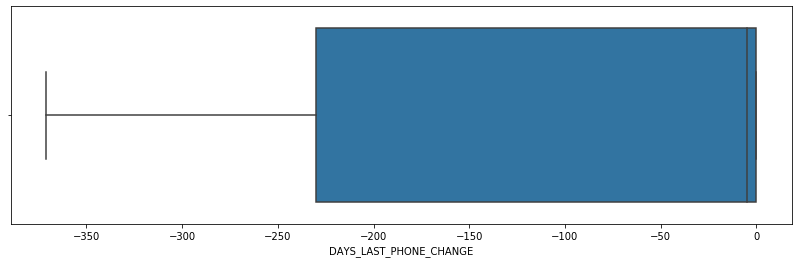

In [50]:
#Plotting box plot for the 'DAYS_LAST_PHONE_CHANGE' column
plt.figure(figsize=(14,4))
sns.boxplot(x=df_7['DAYS_LAST_PHONE_CHANGE'])

## Removing outliers of the 'DAYS_LAST_PHONE_CHANGE'column df_1

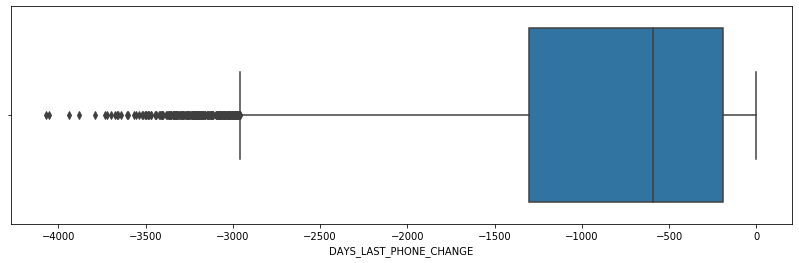

In [51]:
#box plot for the 'DAYS_LAST_PHONE_CHANGE'column df_1
plt.figure(figsize=(14,4))
sns.boxplot(x=df_1['DAYS_LAST_PHONE_CHANGE'])

In [52]:
# Calculating the Inter Quantile value for DAYS_LAST_PHONE_CHANGE column 
Q1_12 = df_1['DAYS_LAST_PHONE_CHANGE'].quantile(0.25)
Q3_12 = df_1['DAYS_LAST_PHONE_CHANGE'].quantile(0.75)
IQR_12 = abs(Q3_12) - abs(Q1_12)
print(IQR_12)

-1107.0


In [53]:
# Removing the outliers from the df_1
df_8 = df_1[~((df_1['DAYS_LAST_PHONE_CHANGE'] < (abs(Q1_12) - 1.5 * abs(IQR_12))) |(df_1['DAYS_LAST_PHONE_CHANGE'] > (abs(Q3_12) + 1.5 * abs(IQR_12))))]
df_8.shape

(8772, 122)

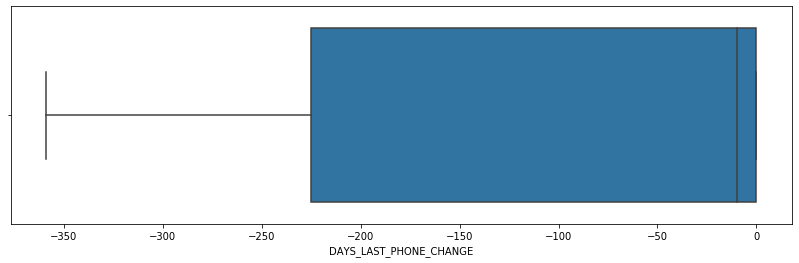

In [54]:
#Plotting box plot for the DAYS_LAST_PHONE_CHANGE column df_1
plt.figure(figsize=(14,4))
sns.boxplot(x=df_8['DAYS_LAST_PHONE_CHANGE'])

## Removing outliers of the 'CNT_CHILDREN'column df_0

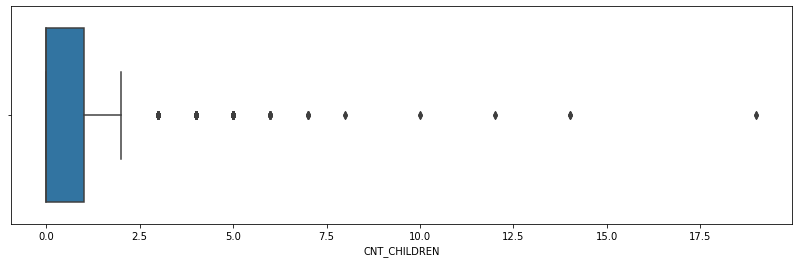

In [55]:
#box plot for the 'CNT_CHILDREN'column df_0
plt.figure(figsize=(14,4))
sns.boxplot(x=df_0['CNT_CHILDREN'])

In [56]:
# Calculating the Inter Quantile value for 'CNT_CHILDREN'column 
Q1_13 = df_1['CNT_CHILDREN'].quantile(0.25)
Q3_13 = df_1['CNT_CHILDREN'].quantile(0.75)
IQR_13 = Q3_13 - Q1_13
print(IQR_13)

1.0


In [57]:
# Removing the outliers from the df_0
df_9 = df_1[~((df_1['CNT_CHILDREN'] < (Q1_13 - 1.5 * IQR_13)) |(df_1['CNT_CHILDREN'] > (Q3_13 + 1.5 * IQR_13)))]
df_9.shape

(24396, 122)

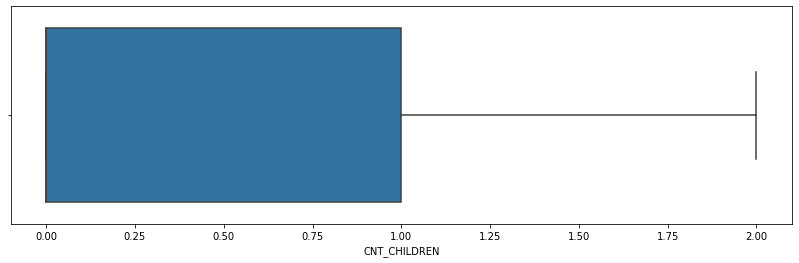

In [58]:
#Plotting box plot for the 'CNT_CHILDREN' column df_0
plt.figure(figsize=(14,4))
sns.boxplot(x=df_9['CNT_CHILDREN'])

# Reading 'previous_application.csv'

In [59]:
df3=  pd.read_csv('previous_application.csv')
df3

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


# Univariate analysis (categorical data) of 'previous_application.csv'

#### Univariate analysis of categorical data "NAME_CLIENT_TYPE", "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE" of 'previous_application.csv' by plotting count plot of  'previous_application.csv'

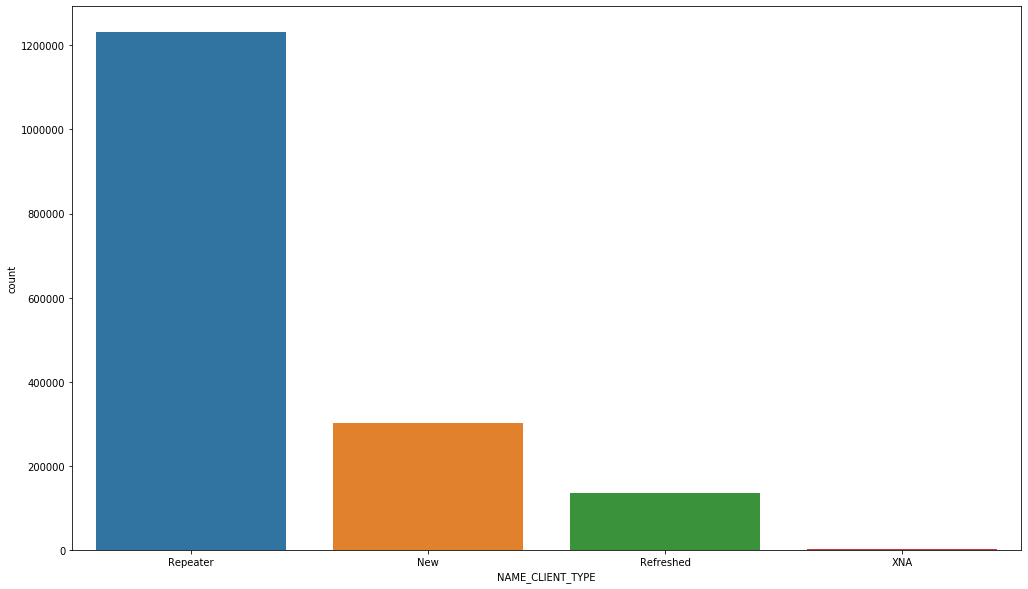

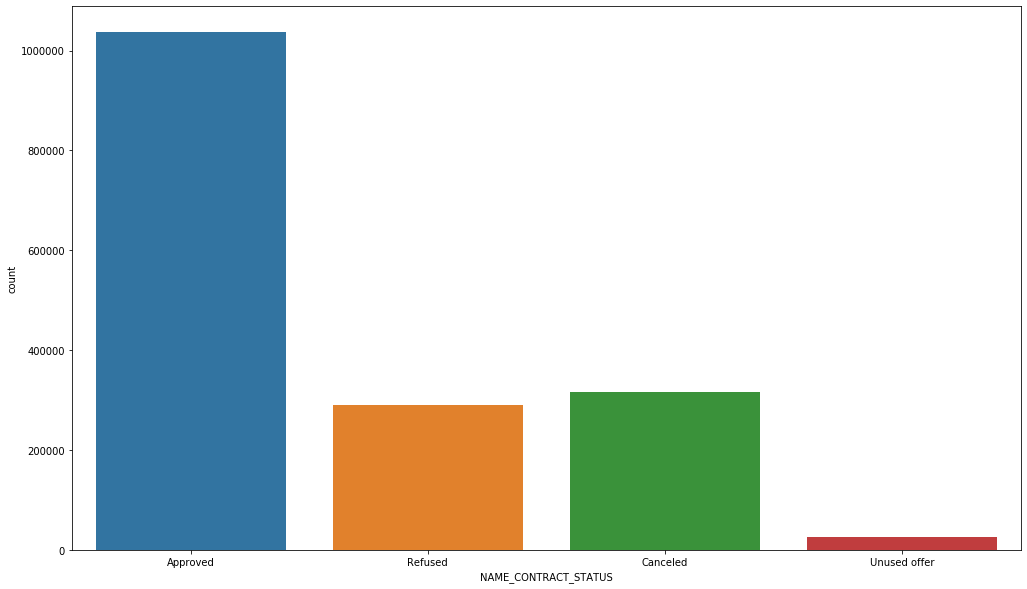

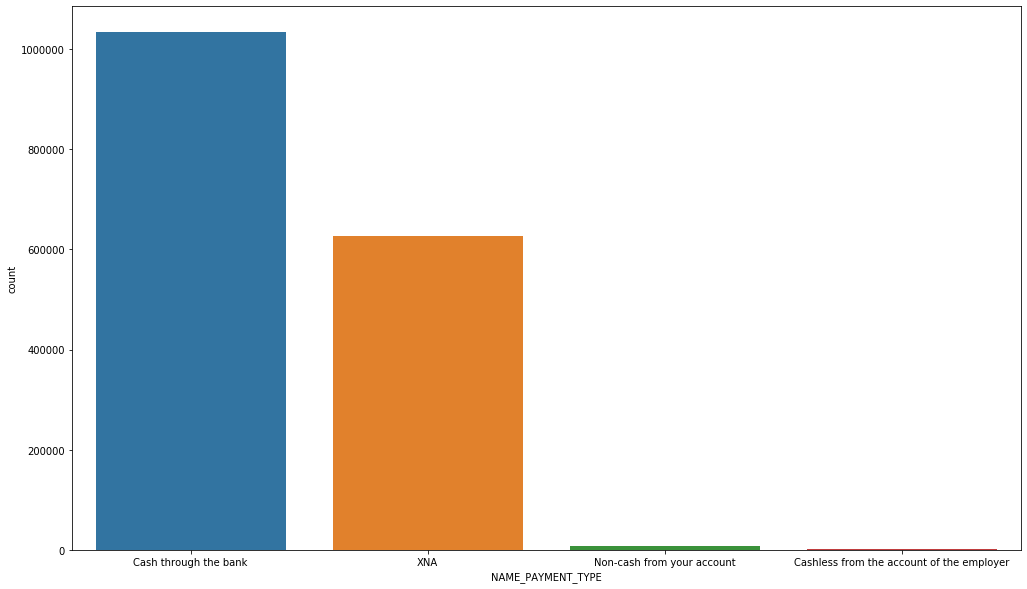

In [60]:
plt.rcParams["figure.figsize"] = [17,10]
list1=["NAME_CLIENT_TYPE","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE"]
for item in list1:    
    sns.countplot(x=item , data = df3)
    plt.show()    
    

#  Univariate analysis (numerical data) of 'previous_application.csv'

####   Univariate analysis of numerical data "CNT_PAYMENT", "NFLAG_INSURED_ON_APPROVAL" of 'previous_application.csv' by plotting count plot of  'previous_application.csv'

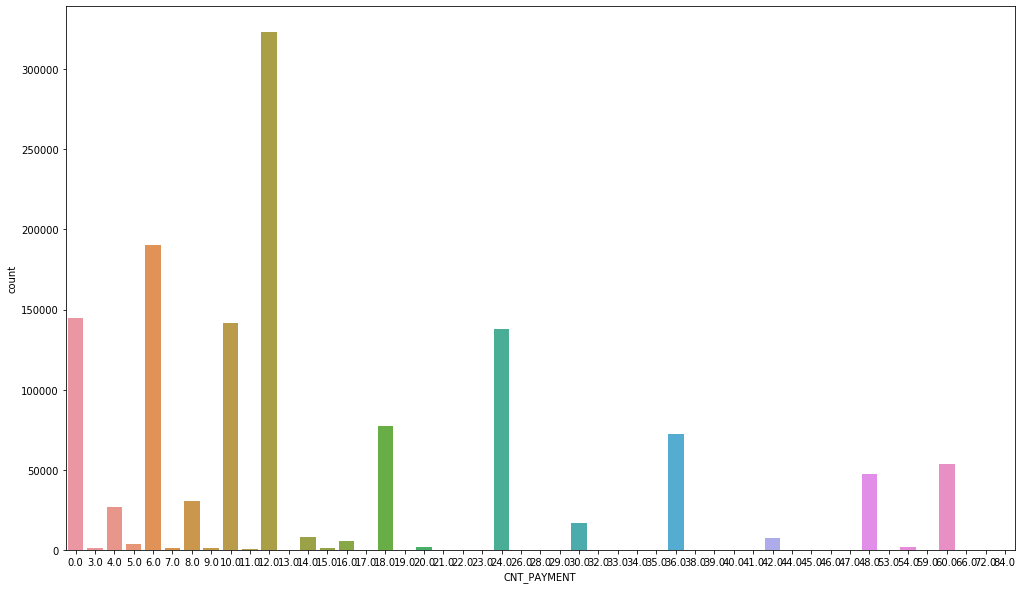

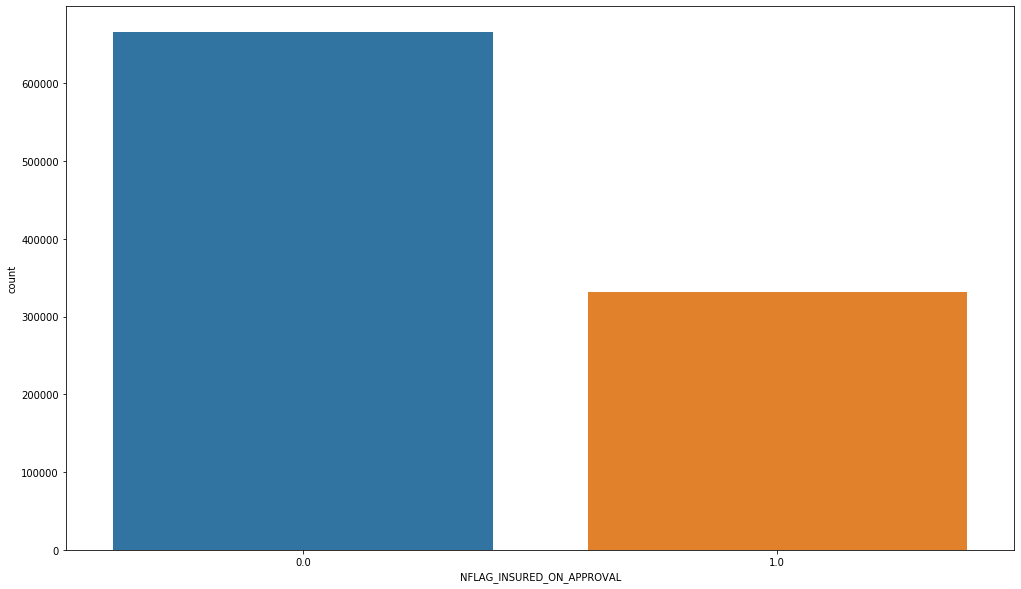

In [61]:
plt.rcParams["figure.figsize"] = [17,10]
list2=["CNT_PAYMENT","NFLAG_INSURED_ON_APPROVAL"]
for item in list2:    
    sns.countplot(x=item , data = df3)
    plt.show()   

# Analysing shape of  "previous_application" dataset 

## Checking Shape of previousapplication_df


In [62]:
# Shape of previousapplication_df
previousapplication_df = df3
previousapplication_df.shape

(1670214, 37)

## Counting number of SK_ID_PREV in previousapplication_df


In [63]:
# counting number of SK_ID_PREV in previousapplication_df
previousapplication_df.SK_ID_PREV.value_counts()

1000983    1
2428426    1
1026910    1
1024863    1
2448896    1
2446849    1
2444802    1
2442755    1
2457092    1
2455045    1
2452998    1
2432520    1
2426379    1
2465304    1
2440716    1
2438669    1
2434575    1
2481680    1
2479633    1
2477586    1
2475539    1
2489876    1
2487829    1
2485782    1
1028957    1
1031004    1
1016667    1
1018714    1
1749501    1
1747454    1
1745407    1
1006400    1
1004353    1
1002306    1
1000259    1
1014596    1
1012549    1
1010502    1
1008455    1
1039184    1
1037137    1
1035090    1
1033043    1
1047380    1
1045333    1
1043286    1
1041239    1
1022808    1
1020761    1
2483735    1
2463257    1
1739258    1
2588228    1
2395706    1
2393659    1
2407996    1
2405949    1
2403902    1
2401855    1
2580032    1
2577985    1
2575938    1
2573891    1
2582087    1
2461210    1
2563656    1
2561609    1
2557515    1
2571852    1
2569805    1
2565711    1
2612816    1
2608722    1
          ..
1957614    1
1861337    1
1867482    1

## Counting number of SK_ID_CURR in previousapplication_df


In [64]:
#Counting number of SK_ID_CURR in previousapplication_df
previousapplication_df.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
156367    66
389950    64
382179    64
198355    63
345161    62
446486    62
238250    61
280586    61
227585    60
206862    60
133023    60
242431    59
401563    59
235163    58
110899    58
205430    55
379932    55
303706    54
297331    54
336606    54
344403    54
426540    53
408214    52
189332    52
404929    52
326092    51
432925    50
330375    50
264093    50
139875    50
104630    50
394280    49
268608    49
321866    47
396540    47
276069    47
306231    47
117425    46
108707    46
231859    46
345886    46
404019    45
283368    44
339961    44
263337    44
175268    44
366646    44
311791    44
260830    44
413017    44
202534    44
166618    44
390000    44
301842    44
192587    43
287693    43
104831    43
269955    43
273804    43
348901    43
347459    43
157138    43
289116    43
115317    43
156668    43
209029    43
107709    43
256334    43
          ..
180827     1
168529     1
445050     1

### Now we will merge on 'SK_ID_CURR' because length of SK_ID_PREV is "1670214 "and length of SK_ID_CURR is "338857" this clearly shows that there are some duplicate or repeated values in SK_ID_PREV. 

# Merging of  "previous_application" dataset and "application_data" dataset on='SK_ID_CURR'

In [65]:
dfboth= pd.merge(applicationdata_df,previousapplication_df,on='SK_ID_CURR',how = 'left')
dfboth

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,Consumer loans,9251.775,179055.000,179055.000,0.00,179055.000,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher educ

## Analysing the repeated values of SK_ID_CURR in merged dataset


In [66]:
dfboth.SK_ID_CURR.value_counts()

265681    73
173680    72
242412    68
206783    67
389950    64
382179    64
198355    63
446486    62
345161    62
238250    61
280586    61
206862    60
133023    60
242431    59
401563    59
235163    58
110899    58
205430    55
379932    55
303706    54
336606    54
297331    54
344403    54
426540    53
189332    52
404929    52
408214    52
326092    51
104630    50
264093    50
432925    50
139875    50
330375    50
394280    49
268608    49
321866    47
276069    47
396540    47
306231    47
231859    46
345886    46
108707    46
404019    45
311791    44
175268    44
339961    44
366646    44
390000    44
283368    44
202534    44
263337    44
156668    43
273804    43
192587    43
287693    43
347459    43
209029    43
157138    43
115317    43
383033    42
262193    42
450063    42
291989    42
146667    42
359287    42
323019    42
143795    42
435183    42
399741    41
341936    41
310072    41
279398    41
149469    41
          ..
313624     1
342310     1
356655     1

## splitting datset into df_0 and df_1

## df_0 consisting of TARGET value =0 i.e. these consist of non-defaulters.
## df_1 consisting of TARGET value =1 i.e. these consist of defaulters.


In [67]:
# splitting datset into df_0 and df_1
df_0= dfboth.loc[dfboth['TARGET']==0]
df_1= dfboth.loc[dfboth['TARGET']==1]

## Bivariate analysis on NAME_INCOME_TYPE and AMT_APPLICATION for df_0


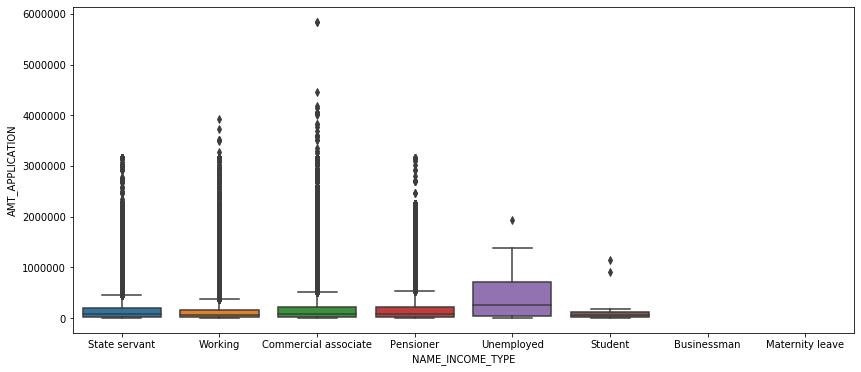

In [68]:
# Bivariate analysis on NAME_INCOME_TYPE and AMT_APPLICATION for df_0
plt.figure(figsize=(14,6))
sns.boxplot( x=df_0["NAME_INCOME_TYPE"], y=df_0["AMT_APPLICATION"] )

## Bivariate analysis on NAME_INCOME_TYPE and AMT_APPLICATION for df_1

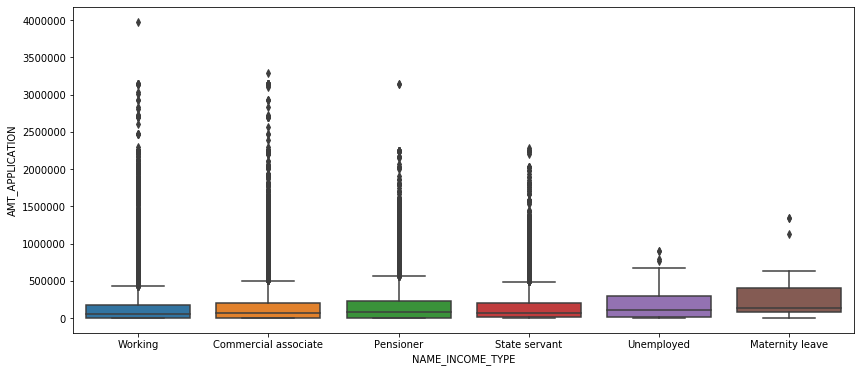

In [69]:
# Bivariate analysis on NAME_INCOME_TYPE and AMT_APPLICATION for df_1
plt.figure(figsize=(14,6))
sns.boxplot( x=df_1["NAME_INCOME_TYPE"], y=df_1["AMT_APPLICATION"] )

## Bivariate analysis on "NAME_CONTRACT_STATUS" and AMT_APPLICATION for df_0

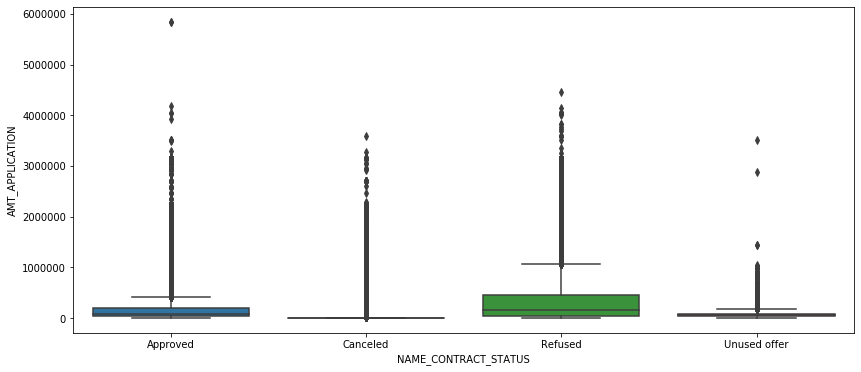

In [70]:
# Bivariate analysis on "NAME_CONTRACT_STATUS" and AMT_APPLICATION for df_0
plt.figure(figsize=(14,6))
sns.boxplot( x=df_0["NAME_CONTRACT_STATUS"], y=df_0["AMT_APPLICATION"] )

## Bivariate analysis on "NAME_CONTRACT_STATUS" and AMT_APPLICATION for df_1

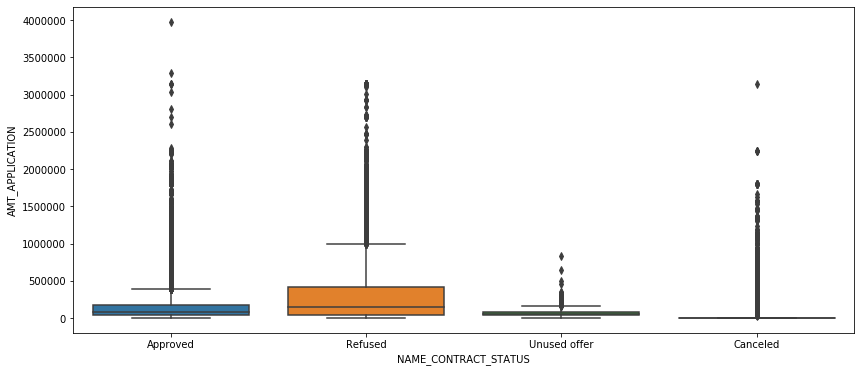

In [71]:
# Bivariate analysis on "NAME_CONTRACT_STATUS" and AMT_APPLICATION for df_1
plt.figure(figsize=(14,6))
sns.boxplot( x=df_1["NAME_CONTRACT_STATUS"], y=df_1["AMT_APPLICATION"] )

# Conclusion:

## • After the entire exercise we concluded the below observation

## • The density of loan getting approved by bank is much higher in working
## category but the volume is much higher in commercial associated

## • Bank are preferring to pay loan to the people with less dependencies ie
## more loan are getting approved for people having children 2 or less

## • Insurance is the key factor to be consider while approving the loan as the
## population facing challenges in replay have not opted for insurance.

## • Also Bank prefers to approve/offer the loan for existing population ie. their
## own customer.